In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 计算欧式距离，即两点间的直线距离 
#参数：vector1-List列表，n维属性坐标值构成的向量
#      vector2-List列表，n维属性坐标值构成的向量
#返回值：浮点数，欧式距离

def euclDistance(vector1, vector2):  
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2)))  

In [3]:
# 创建一个数据集，包含2个类别共8个样本
def createDataSet():
# 生成一个矩阵，每行表示一个样本
    group = np.array([[1.0,0.9], [1.0,1.0], [0.8,0.9], [0.6,0.65],
    [0.1, 0.2], [0.3,0.4], [0.2,0.3], [0.0, 0.1]])
# 监督学习，手工设置8个样本所属的类别标签
    labels = ['A', 'A','A', 'A', 'B', 'B','B', 'B']
    return group, labels

In [4]:
# KNN分类算法函数实现
#参数：newInput-List列表，待分类的数据点
#      dataSet-List列表，已分类点坐标
#      lables-List列表，分类标签
#      k-整数，近邻数量
#返回值：maxIndex-字符，分类结果
def kNNClassify(newInput, dataSet, labels, k):
    numSamples = dataSet.shape[0]   # shape[0]表示行数
    distance = []
#计算newInput与dataSet中个点的距离，放入distance列表内
    for vec in dataSet:
        distance.append(euclDistance(newInput,vec))        
#对距离排序
    sortedDistIndices = np.argsort(distance)
    classCount = {}
#选择k个最近邻
    for i in range(k):
        voteLabel = labels[sortedDistIndices[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    maxCount = 0
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            maxIndex = key
    return maxIndex

In [5]:
# 生成数据集和类别标签
dataSet, labels = createDataSet()
#K取值3，调用K近邻分类算法
k = 3
#对testX进行分类
testX = np.array([1.2, 1.0])
outputLabel = kNNClassify(testX, dataSet, labels, 3)
print( "Your input is:", testX, "and classified to class: ", outputLabel)
#对testY进行分类
testY = np.array([0.1, 0.3])
outputLabel = kNNClassify(testY, dataSet, labels, 3)
print("Your input is:", testY, "and classified to class: ", outputLabel)

Your input is: [1.2 1. ] and classified to class:  A
Your input is: [0.1 0.3] and classified to class:  B


In [6]:
#随机生成K个候选聚类中心点
#参数：dataSet-List列表，已分类点坐标
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机候选中心点坐标
def initCentroids(dataSet, k): 
    numSamples, dim = dataSet.shape
    centroids = np.zeros((k, dim))
    # 循环遍历每一列，在每一列（也就是每一维）的最小值和最大值之间产生K个随机数，作为候选中心点这一维的坐标
    for j in range(dim):
        # 计算每一列的最小值
        minJ = min(dataSet[:, j])
        # 计算每一列的范围值
        rangeJ = float(max(dataSet[:, j]) - minJ)
        # 计算每一列的质心,并将值赋给centroids
        centroids[:, j] = minJ + rangeJ * np.random.rand(k)
    return centroids

#在已有数据点中随机挑选K个作为聚类中心点
#这实际上是K中心点聚类算法的初始化方法
#参数：dataSet-List列表，已分类点坐标
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机候选中心点坐标
def initCentroids1(dataSet, k):  
    numSamples, dim = dataSet.shape  
    centroids = np.zeros((k, dim))  
    for i in range(k):  
        index = int(np.random.uniform(0, numSamples))  
        centroids[i, :] = dataSet[index, :]  
    return centroids

In [7]:
# K均值聚类
#参数：dataSet-List列表，待聚类样本集
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机中心点坐标
#        clusterAssment -列表，各个样本点的聚类结果
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]
#第一列数据存放归属的点
#第二列存放样本与候选聚类中心点之间的误差  
    clusterAssment = np.mat(np.zeros((numSamples, 2)))  
    clusterChanged = True    
    centroids = initCentroids(dataSet, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        for i in range(numSamples):  
            minDist  = 100000.0  
            minIndex = 0  
#依次找出最近候选聚类中心点
            for j in range(k):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  
                    minDist  = distance  
                    minIndex = j  
#更新归属结果
            if clusterAssment[i, 0] != minIndex:  
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist**2  
#更新候选聚类中心点坐标
        for j in range(k):  
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]  
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)  
  
    print('KMN聚类完成!')  
    return centroids, clusterAssment  

In [8]:
# 2维平面显示聚类结果
#参数：dataSet-List列表，样本集
#      k-整数，近邻数量
#      centroids-List列表，聚类中心点坐标
#      clusterAssment-List列表，聚类结果
#返回值：无
def showCluster(dataSet, k, centroids, clusterAssment):  
    fig_2d_clustered=plt.figure()
    ax2d_clustered=fig_2d_clustered.add_subplot(111) 
    
    numSamples, dim = dataSet.shape  
    if dim != 2:  
        print("只能绘制2维图形")  
        return 1  
#创建数据点标记格式控制列表，实现数据点区别输出
    mark = ['.r', '+b', '*g', '1k', '^r', 'vr', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("K值过大！")  
        return 1  
#绘制所有样本点
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        ax2d_clustered.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  

#绘制聚类中心点  
    for i in range(k):
        ax2d_clustered.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
 
    fig_2d_clustered.savefig('clusterRes.png', dpi=300, bbox_inches='tight')
    fig_2d_clustered.show()

step 1: 读入数据：
原始数据分布：


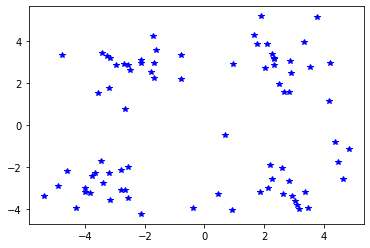

In [9]:
#调用以上函数，对读入数据进行聚类
print("step 1: 读入数据：")  
dataSetKMN = []  
fileIn = open('testSet.txt')  
for line in fileIn.readlines():  
    lineArr = line.strip().split(' ')  
    dataSetKMN.append([float(lineArr[0]), float(lineArr[1])])  
dataSetKMNSize = len(dataSetKMN)
dataSetKMN = np.mat(dataSetKMN)
for i in range(dataSetKMNSize):
    plt.plot(dataSetKMN[i, 0], dataSetKMN[i, 1],'b*') 
print("原始数据分布：") 
plt.savefig('ch12_kmn_orig.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
#K取值4，调用K均值算法聚类
print("step 2: 聚类")    
k = 4
centroids, clusterAssment = kmeans(dataSetKMN, k) 

step 2: 聚类
KMN聚类完成!


step 3: 结果输出：


C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


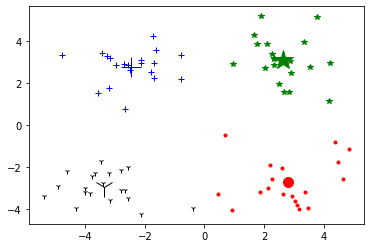

In [11]:
print("step 3: 结果输出：")  
showCluster(dataSetKMN, k, centroids, clusterAssment)

In [12]:
#计算代价TC
#参数：dataSet-List列表，样本集
#      k-整数，近邻数量
#      medoids_idx-List列表，候选中心点
#      clusterAssment-List列表，聚类结果
#返回值：total_cost-浮点数，TC代价
#        medoids-List2维列表，本次归属到各中心点的样本点
def totalcost(dataSet, medoids_idx) :
    distances_cache = {}
    size = len(dataSet)
    total_cost = 0.0
    medoids = {}
    for idx in medoids_idx :
        medoids[idx] = []
    for i in range(size) :
        choice = None
        min_cost = 100000
#计算各样本数据点到medoids_idx的距离，将其归属到距离最近的那个中心点
        for m in medoids :
            tmp = distances_cache.get((m,i),None)
            if tmp == None :
                tmp = euclDistance(dataSet[m],dataSet[i])
                distances_cache[(m,i)] = tmp
            if tmp < min_cost :
                choice = m
                min_cost = tmp
        medoids[choice].append(i)
        total_cost += min_cost
    return total_cost, medoids

In [13]:
# K中心点聚类
#参数：dataSet-List列表，待聚类样本集
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个中心点坐标
#        clusterAssment -列表，各个样本点的聚类结果

import random

def kmedoids(dataSet, k) :
    size ,dim= dataSet.shape
    centroids = np.zeros((k,dim))
    clusterAssment = np.mat(np.zeros((size, 2)))    
    medoids_idx = random.sample([i for i in range(size)], k)
    pre_cost, medoids = totalcost(dataSet,medoids_idx)
    current_cost = 100000    
    best_choice = []
    best_res = {}
    iter_count = 0
#反复计算TC，进行聚类
    while 1 :
        for m in medoids :
            for item in medoids[m] :
                if item != m :
                    idx = medoids_idx.index(m)
                    swap_temp = medoids_idx[idx]
                    medoids_idx[idx] = item
                    tmp,medoids_ = totalcost(dataSet,medoids_idx)
                    if tmp < current_cost :
                        best_choice = list(medoids_idx)
                        best_res = dict(medoids_)
                        current_cost = tmp
                    medoids_idx[idx] = swap_temp
        iter_count += 1
        if best_choice == medoids_idx : break
        if current_cost <= pre_cost :
            pre_cost = current_cost
            medoids = best_res
            medoids_idx = best_choice
    
    centNum=0;
    for index in best_choice:
        centroids[centNum,:]=dataSet[index,:]
        centNum += 1
    
    classNumber = 0
    for key in best_res:
        for index in best_res[key]:
            clusterAssment[index,0]=classNumber
        classNumber += 1
      
    print('KMed聚类完成!')  
    return centroids, clusterAssment

K中心点算法聚类:
KMed聚类完成!


C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


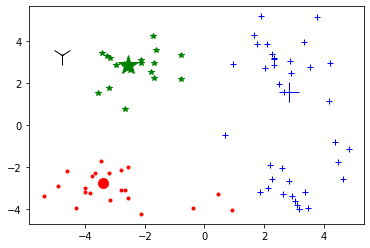

In [14]:
print("K中心点算法聚类:")  
dataSetKMed = []  
fileIn = open('testSet.txt')  
for line in fileIn.readlines():  
    lineArr = line.strip().split(' ')  
    dataSetKMed.append([float(lineArr[0]), float(lineArr[1])])  
dataSetKMedSize = len(dataSetKMed)
dataSetKMed = np.mat(dataSetKMed)
#K取值4，调用K中心点算法聚类
k = 4
centroids, clusterAssment = kmedoids(dataSetKMed,k) 
showCluster(dataSetKMed, k, centroids, clusterAssment)

In [15]:
X_origin = pd.read_csv('ch12_Mall_Customers.csv',encoding='gb2312')
print('原始数据头5行：')
print(X_origin.shape)
print(X_origin.head())

X = X_origin.drop(['ID','性别'],axis=1)

原始数据头5行：
(200, 5)
   ID      性别  年龄  年收入(万元)  消费评分(1-100)
0   1    Male  19       15           39
1   2    Male  21       15           81
2   3  Female  20       16            6
3   4  Female  23       16           77
4   5  Female  31       17           40


In [16]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled_frame = pd.DataFrame(X_scaled,columns=['atr1','atr2','atr3'])
print('规格化转换后数据：')
print(X_scaled_frame.head())

规格化转换后数据：
       atr1      atr2      atr3
0 -1.424569 -1.738999 -0.434801
1 -1.281035 -1.738999  1.195704
2 -1.352802 -1.700830 -1.715913
3 -1.137502 -1.700830  1.040418
4 -0.563369 -1.662660 -0.395980


绘制3维图：


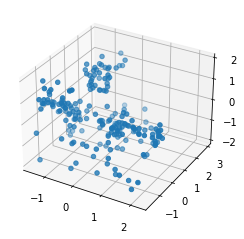

In [17]:
from mpl_toolkits.mplot3d import Axes3D

print('绘制3维图：')
#创建一个三维的绘图工程
fig_3d=plt.figure()
ax3d=fig_3d.add_subplot(111,projection='3d') 
ax3d.scatter(X_scaled_frame['atr1'],X_scaled_frame['atr2'],X_scaled_frame['atr3']) 
fig_3d.savefig('ch12case_01.png', dpi=300, bbox_inches='tight')

      pca_1     pca_2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740
绘制2维图：


C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


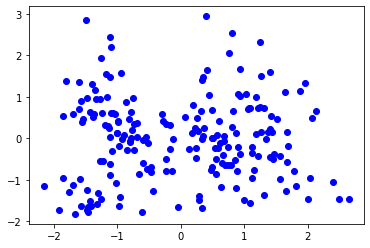

In [18]:
#数据降为2维
#在sklearn中提供了PCA函数，可以将高维数据降为低维
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2'])
print(X_pca_frame.head())
print('绘制2维图：')
fig_2d=plt.figure()
#创建一个二维的绘图工程
ax2d=fig_2d.add_subplot(111) 
ax2d.plot(X_pca_frame['pca_1'],X_pca_frame['pca_2'],'bo') 
fig_2d.savefig('ch12case_02.png', dpi=300, bbox_inches='tight')
fig_2d.show()

K均值聚类：
KMN聚类完成!


C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


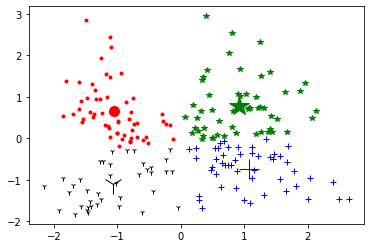

In [19]:
k=4
print("K均值聚类：")
case_cen, case_clusterAssment = kmeans(X_pca, k)
showCluster(X_pca, k, case_cen, case_clusterAssment) 

K中心点聚类：
KMed聚类完成!


C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


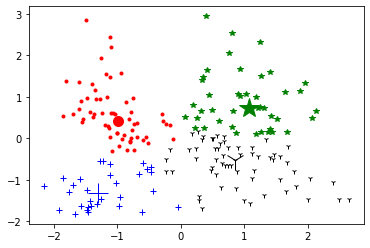

In [20]:
print("K中心点聚类：")
case_cen, case_clusterAssment = kmedoids(X_pca, k)
showCluster(X_pca, k, case_cen, case_clusterAssment) 

In [21]:
#将case_clusterAssment中的聚类结果写回原始DataFrame
X_origin['聚类结果']=case_clusterAssment[:,0]
print('聚类结果：')
print(X_origin.head(15))
#查看按照聚类结果分组的各属性均值
print('聚类结果按年龄统计均值')
g_Age=X_origin['年龄'].groupby(X_origin['聚类结果'])
print(g_Age.mean())
print('聚类结果按年收入统计均值')
g_Income=X_origin['年收入(万元)'].groupby(X_origin['聚类结果'])
print(g_Income.mean())
print('聚类结果按消费评分统计均值')
g_Rate=X_origin['消费评分(1-100)'].groupby(X_origin['聚类结果'])
print(g_Rate.mean())

聚类结果：
    ID      性别  年龄  年收入(万元)  消费评分(1-100)  聚类结果
0    1    Male  19       15           39   1.0
1    2    Male  21       15           81   1.0
2    3  Female  20       16            6   3.0
3    4  Female  23       16           77   1.0
4    5  Female  31       17           40   1.0
5    6  Female  22       17           76   1.0
6    7  Female  35       18            6   3.0
7    8  Female  23       18           94   1.0
8    9    Male  64       19            3   3.0
9   10  Female  30       19           72   1.0
10  11    Male  67       19           14   3.0
11  12  Female  35       19           99   1.0
12  13  Female  58       20           15   3.0
13  14  Female  24       20           77   1.0
14  15    Male  37       20           13   3.0
聚类结果按年龄统计均值
聚类结果
0.0    29.672131
1.0    25.343750
2.0    45.488889
3.0    50.032258
Name: 年龄, dtype: float64
聚类结果按年收入统计均值
聚类结果
0.0    77.852459
1.0    29.687500
2.0    82.911111
3.0    43.258065
Name: 年收入(万元), dtype: float64
聚类结果按消费评分统计均值
聚类

step1: 原始数据分布：
step 2: 聚类
KMN聚类完成!
step 3: 结果输出：


C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


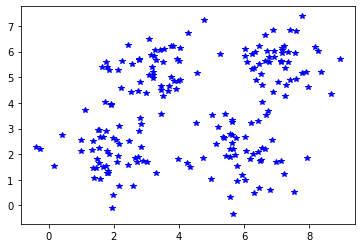

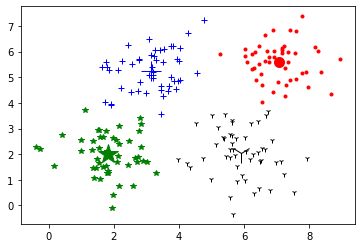

In [22]:
'''
复习思考题1：给出一个数据集data_multivar.txt，里面有200个点坐标，
用K均值算法来训练模型，将该数据集的200个点分成4类，
读者可以在程序中设置k值为2，3，5等，运行代码进行比较。
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

origData = pd.read_csv("data_multivar.txt",header=None)

dataSetKMNSize = len(origData)
dataSetKMN = np.mat(origData)
print("step1: 原始数据分布：") 
for i in range(dataSetKMNSize):
    plt.plot(dataSetKMN[i, 0], dataSetKMN[i, 1],'b*') 

print("step 2: 聚类")    
k = 4
centroids, clusterAssment = kmeans(dataSetKMN, k) 

print("step 3: 结果输出：")  
showCluster(dataSetKMN, k, centroids, clusterAssment)

step1: 原始数据分布：
step 2: 聚类
KMN聚类完成!
step 3: 结果输出：
聚类结果：
     地区        人口数    男女比例    人口数adj   男女比例adj  聚类结果
0    北京   19612368  106.75  0.163941  0.402308   3.0
1    天津   12938693  114.52  0.098072  1.000000   0.0
2    河北   71854210  102.84  0.679562  0.101538   1.0
3    山西   35712101  105.56  0.322843  0.310769   3.0
4   内蒙古   24706291  108.17  0.214217  0.511538   3.0
5    辽宁   43746323  102.54  0.402140  0.078462   1.0
6    吉林   27452815  102.67  0.241325  0.088462   3.0
7   黑龙江   38313991  102.85  0.348524  0.102308   3.0
8    上海   23019196  106.19  0.197566  0.359231   3.0
9    江苏   78660941  101.52  0.746743  0.000000   1.0
10   浙江   54426891  105.69  0.507556  0.320769   1.0
11   安徽   59500468  103.39  0.557632  0.143846   1.0
12   福建   36894217  105.96  0.334511  0.341538   3.0
13   江西   44567797  106.67  0.410248  0.396154   3.0
14   青海    5626723  107.40  0.025904  0.452308   3.0
15   新疆   21815815  106.87  0.185689  0.411538   3.0
16   山东   95792719  102.33  0.915832  0.0623

C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


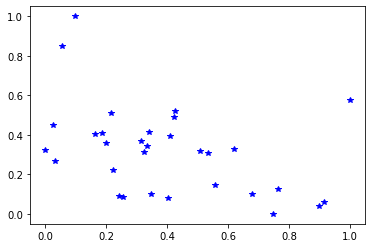

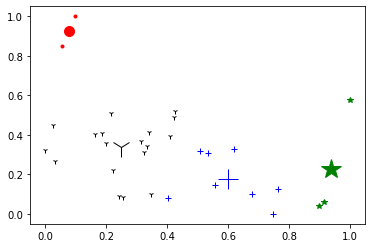

In [23]:
'''
复习思考题2：中华人民共和国第六次人口普查的各地区人口数以及男女比例进行K-means聚类分析.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

origData = pd.read_csv("population.txt",sep=',')

#对于Kmeans这样的距离聚类算法而言，如果某个属性的数值远大于其他属性，
#那么聚类结果很可能就是对这个属性的一个划分，其他属性被弱化
#本例人口数数据跨度从3百万到超过1亿，将其数据尺度缩小到[0，1]之间，可以改善聚类效果
#第4小节的案例用了preprocessing.scale()，下面使用比较简单的最大值最小值缩放
#请比较一下不做缩放和做了缩放之后的聚类效果
maxPopu = origData['人口数'].max()
minPopu = origData['人口数'].min()
origData['人口数adj']=(origData['人口数']-minPopu)/(maxPopu-minPopu)
maxRate = origData['男女比例'].max()
minRate = origData['男女比例'].min()
origData['男女比例adj']=(origData['男女比例']-minRate)/(maxRate-minRate)

dataSetKMNSize = len(origData)
dataSetKMN = np.mat(origData[['人口数adj','男女比例adj']])

print("step1: 原始数据分布：") 
for i in range(dataSetKMNSize):
    plt.plot(dataSetKMN[i, 0], dataSetKMN[i, 1],'b*') 
    
print("step 2: 聚类")    
k = 4
centroids, clusterAssment = kmeans(dataSetKMN, k) 

print("step 3: 结果输出：")  
showCluster(dataSetKMN, k, centroids, clusterAssment)

#将case_clusterAssment中的聚类结果写回原始DataFrame
origData['聚类结果']=clusterAssment[:,0]
print('聚类结果：')
print(origData)

  province     x1     x2     x3      x4      x5     x6  gdp  geo
0    北京     21.76  15.01  12.23    0.02   10.69   3.09    2    1
1    天津      7.47   4.19   4.80    0.00   11.44   7.68    3    1
2  河北       21.92  43.49  69.43    9.40  100.00  45.79    2    1
3  山西       13.79  58.94  93.45  100.00   44.60  15.04    3    1
4  内蒙古       7.44  37.97  69.87    2.16   37.87   9.02    3    1
规格化转换后数据：
       atr1      atr2      atr3
0 -1.424569 -1.738999 -0.434801
1 -1.281035 -1.738999  1.195704
2 -1.352802 -1.700830 -1.715913
3 -1.137502 -1.700830  1.040418
4 -0.563369 -1.662660 -0.395980
      pca_1     pca_2
0 -0.291071 -0.549709
1 -1.182082 -0.543312
2  3.303118  1.699791
3  1.594474  4.899828
4  0.403719  1.813386
K均值聚类：
KMN聚类完成!
聚类结果：
    province      x1      x2      x3      x4      x5      x6  gdp  geo  聚类结果
0      北京      21.76   15.01   12.23    0.02   10.69    3.09    2    1   3.0
1      天津       7.47    4.19    4.80    0.00   11.44    7.68    3    1   0.0
2    河北        21.92   

C:\Users\houfang\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


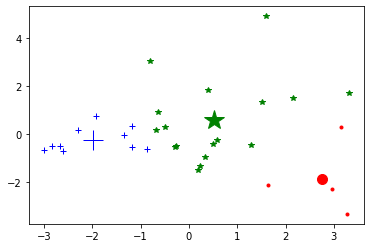

In [24]:
'''
复习思考题3：某年各省级行政区环境污染状况的统计数据（已经过标准化处理），
包括生活污水排放量（x1）,生活二氧化硫排放量（x2）,生活烟尘排放量（x3）,工业固体废物排放量（x4）,
工业废气排放总量（x5）,工业废水排放量（x6），GDP水平（gdp）以及地理位置（geo）等。
现采用K-Means聚类方法，编写Python程序将省级行政区分成4类。详细数据见文件“环境污染数据.txt”。
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#请注意原始数据文件的编码方式及分隔符
origData = pd.read_csv("环境污染数据.txt",encoding='ANSI',sep='\t')
print(origData.head())
#KMean可以支持高维数据聚类，但是本章节用于绘制图形的函数showCluster()只支持2维图像
#故使用PCA将本案例的数据将为2维聚类。读者可以自行尝试不降维聚类。
X = origData.drop(['province'],axis=1)

from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

print('规格化转换后数据：')
print(X_scaled_frame.head())

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2'])
print(X_pca_frame.head())

k=3
print("K均值聚类：")
case_cen, case_clusterAssment = kmeans(X_pca, k)
showCluster(X_pca, k, case_cen, case_clusterAssment) 

#将case_clusterAssment中的聚类结果写回原始DataFrame
origData['聚类结果']=clusterAssment[:,0]
print('聚类结果：')
print(origData)